### One hot Encoding using Pandas

In [114]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [115]:
df = pd.read_csv('csv/homeprices_en.csv')
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [116]:
dummies = pd.get_dummies(df.town, dtype = int)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [117]:
merged = pd.concat([df, dummies], axis = 1)
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [118]:
final_df = merged.drop(['town', 'west windsor'], axis = 1)
final_df

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [119]:
model = LinearRegression()

In [120]:
X = final_df.drop('price', axis = 1)
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [121]:
y = final_df.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [122]:
model.fit(X, y)

LinearRegression()

In [123]:
model.predict([[2800, 0, 1]])

c:\Users\soura\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [124]:
model.predict([[3400, 0, 0]])

c:\Users\soura\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [125]:
model.score(X, y)

0.9573929037221872

### One Hot Encoding using Sklearn

In [126]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [127]:
le = LabelEncoder()

In [128]:
dfle = df.copy()
dfle

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [129]:
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [130]:
X = dfle[['town', 'area']]
X

,town,area
0,0,2600
1,0,3000
2,0,3200
3,0,3600
4,0,4000
5,2,2600
6,2,2800
7,2,3300
8,2,3600
9,1,2600


In [131]:
y = dfle.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [132]:
ohe = OneHotEncoder()
ct = ColumnTransformer([('town', ohe, [0])], remainder = 'passthrough')

In [133]:
X = ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [134]:
X = X[:, 1:]
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [135]:
model2 = LinearRegression()

In [136]:
model2.fit(X, y)

LinearRegression()

In [137]:
model2.predict([[1, 0, 2800]])

array([590775.63964739])

In [138]:
model2.predict([[0, 1, 3400]])

array([681241.6684584])

### Exercise 4

In [139]:
import matplotlib.pyplot as plt

In [140]:
car_df = pd.read_csv('csv/carprices.csv')
car_df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


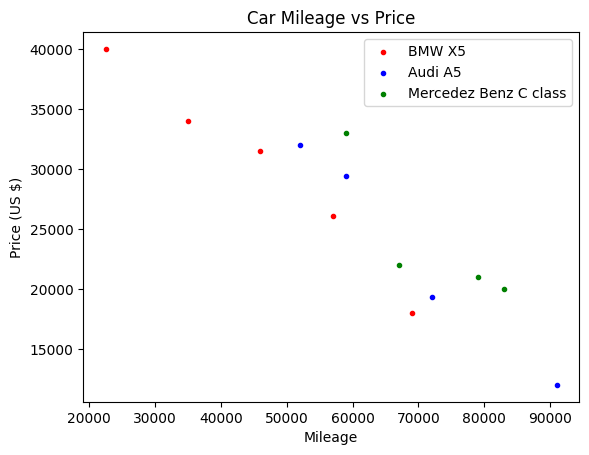

In [141]:
plt.title('Car Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price (US $)')

plt.scatter(car_df.loc[car_df['Car Model'] == 'BMW X5', 'Mileage'], car_df.loc[car_df['Car Model'] == 'BMW X5', 'Sell Price($)'], color = 'red', marker = '.')
plt.scatter(car_df.loc[car_df['Car Model'] == 'Audi A5', 'Mileage'], car_df.loc[car_df['Car Model'] == 'Audi A5', 'Sell Price($)'], color = 'blue', marker = '.')
plt.scatter(car_df.loc[car_df['Car Model'] == 'Mercedez Benz C class', 'Mileage'], car_df.loc[car_df['Car Model'] == 'Mercedez Benz C class', 'Sell Price($)'], color = 'green', marker = '.')

plt.legend(['BMW X5', 'Audi A5', 'Mercedez Benz C class'])

plt.show()

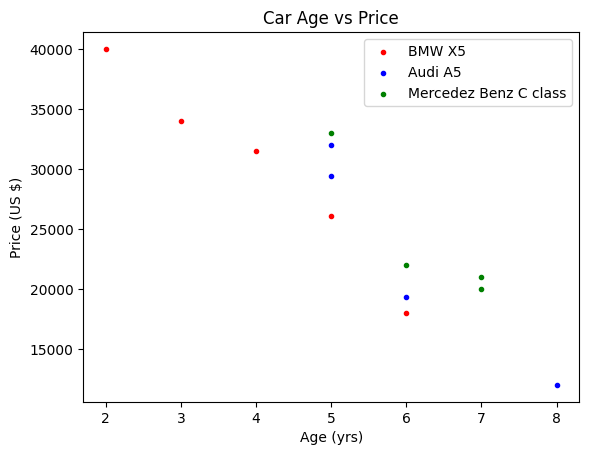

In [142]:
plt.title('Car Age vs Price')
plt.xlabel('Age (yrs)')
plt.ylabel('Price (US $)')

plt.scatter(car_df.loc[car_df['Car Model'] == 'BMW X5', 'Age(yrs)'], car_df.loc[car_df['Car Model'] == 'BMW X5', 'Sell Price($)'], color = 'red', marker = '.')
plt.scatter(car_df.loc[car_df['Car Model'] == 'Audi A5', 'Age(yrs)'], car_df.loc[car_df['Car Model'] == 'Audi A5', 'Sell Price($)'], color = 'blue', marker = '.')
plt.scatter(car_df.loc[car_df['Car Model'] == 'Mercedez Benz C class', 'Age(yrs)'], car_df.loc[car_df['Car Model'] == 'Mercedez Benz C class', 'Sell Price($)'], color = 'green', marker = '.')

plt.legend(['BMW X5', 'Audi A5', 'Mercedez Benz C class'])

plt.show()

In [143]:
car_df['Car Model'] = le.fit_transform(car_df['Car Model'])
car_df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [144]:
X1 = car_df[['Car Model', 'Mileage', 'Age(yrs)']].values
X1

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [145]:
y1 = car_df['Sell Price($)']
y1

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [146]:
ohe1 = OneHotEncoder()
ct1 = ColumnTransformer([('Car Model', ohe1, [0])], remainder = 'passthrough')

In [147]:
X1 = ct1.fit_transform(X1)
X1

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [148]:
X1 = X1[:, 1:]
X1

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [149]:
model3 = LinearRegression()

In [150]:
model3.fit(X1, y1)

LinearRegression()

In [151]:
model3.predict([[0, 1, 45000, 4]])

array([36991.31721062])

In [152]:
model3.predict([[1, 0, 86000, 7]])

array([11080.74313219])

In [153]:
model3.score(X1, y1)

0.9417050937281082